Button(description='Show 3D Surfaces', style=ButtonStyle())

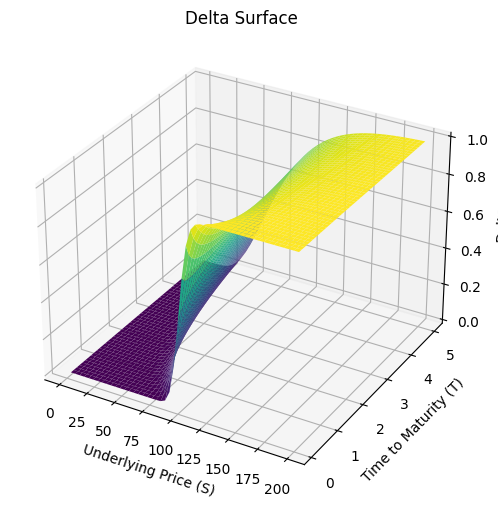

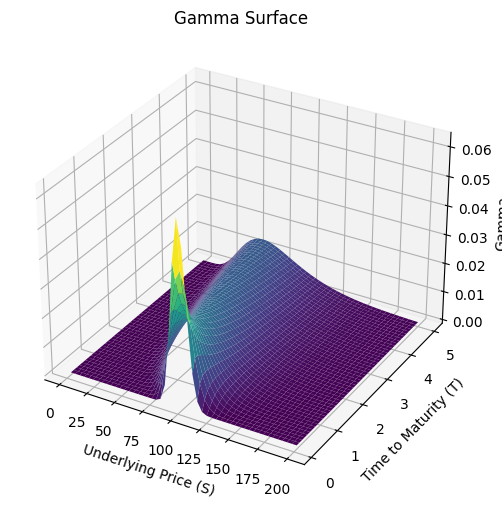

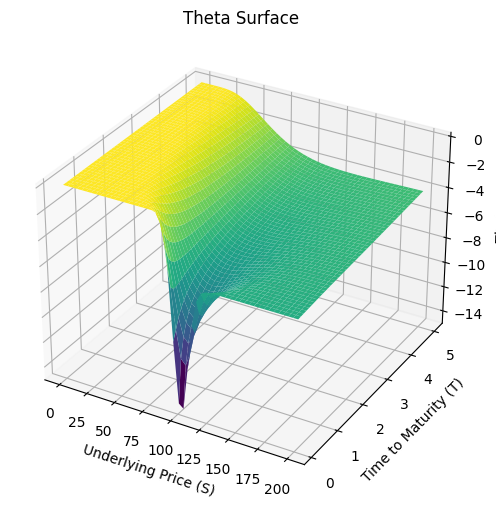

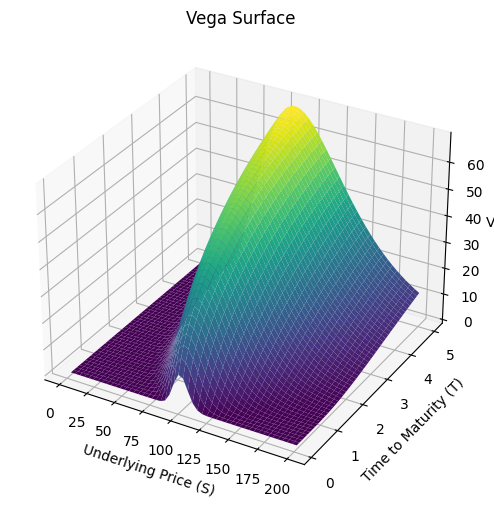

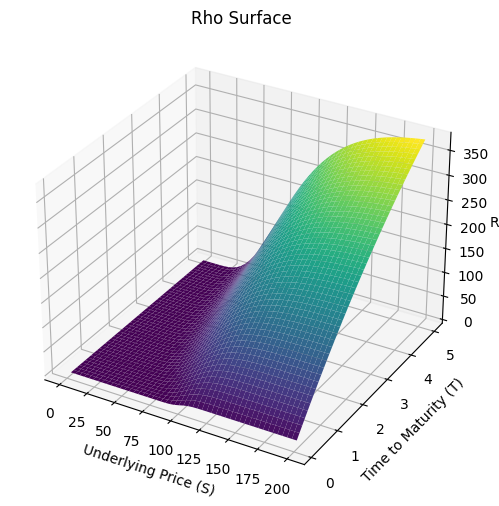

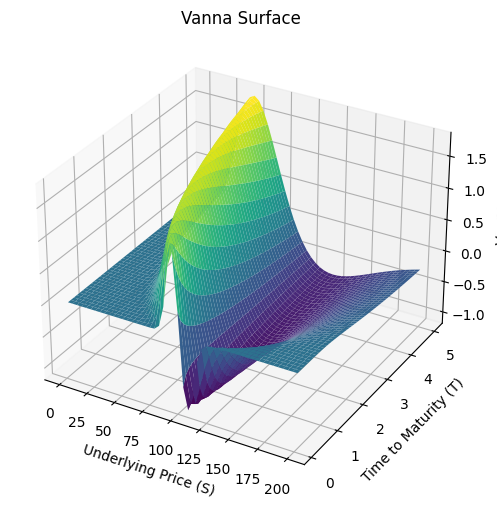

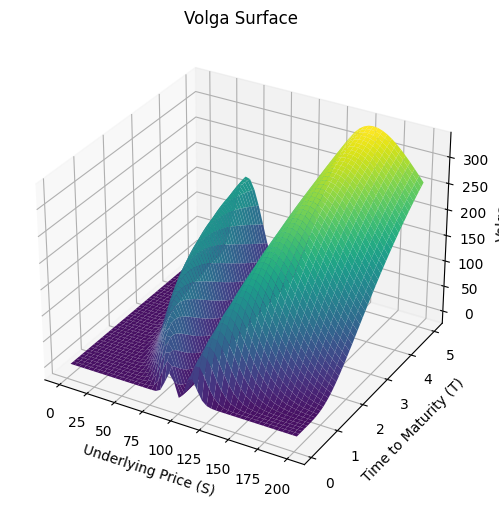

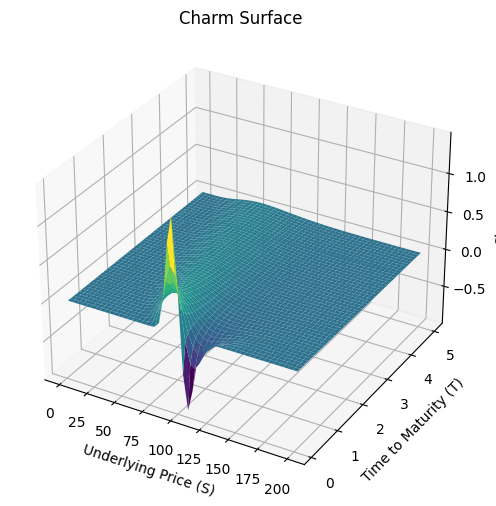

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display
from scipy.stats import norm

# Fonction pour calculer les lettres grecques et les prix des options
def black_scholes_values(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

    delta = norm.cdf(d1)
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    theta = - (S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2)
    vega = S * norm.pdf(d1) * np.sqrt(T)
    rho = K * T * np.exp(-r * T) * norm.cdf(d2)

    vanna = -norm.pdf(d1) * d2 / sigma
    volga = S * norm.pdf(d1) * np.sqrt(T) * d1 * d2 / sigma
    charm = norm.pdf(d1) * (2 * r * T - d2 * sigma * np.sqrt(T)) / (2 * T * sigma * np.sqrt(T))

    return call_price, put_price, delta, gamma, theta, vega, rho, vanna, volga, charm

# Fonction pour créer et afficher la surface 3D
def plot_3d_surface(x, y, z, x_label, y_label, z_label):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, cmap='viridis')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_zlabel(z_label)
    ax.set_title(f'{z_label} Surface')
    plt.show()

# Fonction de mise à jour pour afficher les surfaces 3D
def update_3d_surfaces(change):
    sigma = sigma_widget.value
    r = r_widget.value

    greeks_values = [
        ('Delta', delta_values),
        ('Gamma', gamma_values),
        ('Theta', theta_values),
        ('Vega', vega_values),
        ('Rho', rho_values),
        ('Vanna', vanna_values),
        ('Volga', volga_values),
        ('Charm', charm_values)
    ]

    for greek_label, greek_array in greeks_values:
        for i in range(grid_size):
            for j in range(grid_size):
                S_val = S_grid[i, j]
                T_val = T_grid[i, j]
                _, _, delta, gamma, theta, vega, rho, vanna, volga, charm = black_scholes_values(S_val, K_widget.value, T_val, r, sigma)
                greek_array[i, j] = delta if greek_label == 'Delta' else gamma if greek_label == 'Gamma' else theta if greek_label == 'Theta' else vega if greek_label == 'Vega' else rho if greek_label == 'Rho' else vanna if greek_label == 'Vanna' else volga if greek_label == 'Volga' else charm

        plot_3d_surface(S_grid, T_grid, greek_array, 'Underlying Price (S)', 'Time to Maturity (T)', greek_label)

# Création des widgets interactifs
S_widget = widgets.FloatSlider(value=100, min=1, max=200, step=1, description='S:')
K_widget = widgets.FloatSlider(value=100, min=1, max=200, step=1, description='K:')
T_widget = widgets.FloatSlider(value=1, min=0.1, max=5, step=0.1, description='T:')
r_widget = widgets.FloatSlider(value=0.05, min=0, max=0.2, step=0.01, description='r:')
sigma_widget = widgets.FloatSlider(value=0.2, min=0, max=1, step=0.01, description='sigma:')

# Création des tableaux pour stocker les valeurs des lettres grecques
grid_size = 50
S_values = np.linspace(1, 200, grid_size)
T_values = np.linspace(0.1, 5, grid_size)
S_grid, T_grid = np.meshgrid(S_values, T_values)

delta_values = np.zeros((grid_size, grid_size))
gamma_values = np.zeros((grid_size, grid_size))
theta_values = np.zeros((grid_size, grid_size))
vega_values = np.zeros((grid_size, grid_size))
rho_values = np.zeros((grid_size, grid_size))
vanna_values = np.zeros((grid_size, grid_size))
volga_values = np.zeros((grid_size, grid_size))
charm_values = np.zeros((grid_size, grid_size))

# Fonction de mise à jour pour afficher les valeurs des lettres grecques
def update_values(change):
    S = S_widget.value
    K = K_widget.value
    T = T_widget.value
    r = r_widget.value
    sigma = sigma_widget.value

    call_price, put_price, delta, gamma, theta, vega, rho, vanna, volga, charm = black_scholes_values(S, K, T, r, sigma)

    call_price_output.value = f"Call Price: {call_price:.2f}"
    put_price_output.value = f"Put Price: {put_price:.2f}"
    delta_output.value = f"Delta: {delta:.2f}"
    gamma_output.value = f"Gamma: {gamma:.2f}"
    theta_output.value = f"Theta: {theta:.2f}"
    vega_output.value = f"Vega: {vega:.2f}"
    rho_output.value = f"Rho: {rho:.2f}"
    vanna_output.value = f"Vanna: {vanna:.2f}"
    volga_output.value = f"Volga: {volga:.2f}"
    charm_output.value = f"Charm: {charm:.2f}"

# Lier les fonctions de mise à jour aux widgets
S_widget.observe(update_values, 'value')
K_widget.observe(update_values, 'value')
T_widget.observe(update_values, 'value')
r_widget.observe(update_values, 'value')
sigma_widget.observe(update_values, 'value')

# Création des widgets pour afficher les valeurs
call_price_output = widgets.Label()
put_price_output = widgets.Label()
delta_output = widgets.Label()
gamma_output = widgets.Label()
theta_output = widgets.Label()
vega_output = widgets.Label()
rho_output = widgets.Label()
vanna_output = widgets.Label()
volga_output = widgets.Label()
charm_output = widgets.Label()

# Création du bouton pour afficher les surfaces 3D
show_3d_button = widgets.Button(description='Show 3D Surfaces')
show_3d_button.on_click(update_3d_surfaces)

# Affichage des widgets et du bouton
input_widgets = widgets.VBox([S_widget, K_widget, T_widget, r_widget, sigma_widget])
output_widgets = widgets.VBox([call_price_output, put_price_output, delta_output, gamma_output, theta_output, vega_output, rho_output, vanna_output, volga_output, charm_output])
display(widgets.HBox([input_widgets, output_widgets]), show_3d_button)
